In [123]:
import pandas as pd
#pd.set_option('max_colwidth', 50)
# set this if you need to
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

In [6]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()


,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [ ]:
# 1. Make the following changes to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

In [80]:
killings.rename(columns={'lawenforcementagency':'agency', 'raceethnicity':'race'},inplace=True)

In [81]:
killings.head(1)

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766


In [32]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [37]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.streetaddress.fillna(value='Unknown', inplace=True)

In [38]:
# 3a checking to make sure all null values replaced.
killings['streetaddress'].isnull().sum()

0

In [82]:
# 4. How many killings were there so far in 2015?
killings.year.value_counts()

2015    467
Name: year, dtype: int64

In [89]:
# 5. Of all killings, how many were male and how many female?

killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [90]:
# 6. How many killings were of unarmed people?
#Showed all categories here. Filtered specifically to armed =No below

killings.armed.value_counts()



Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

In [114]:
# 6. How many killings were of unarmed people? Same question, just filtered to only "unarmed"


len(killings[killings.armed=='No'])

102

In [111]:
# 7. What percentage of all killings were unarmed?
#Is one of these better than the other? Also, should I display it as a percent?? (format_val)
#(killings.armed.value_counts() / killings.armed.value_counts().sum()) * 100
len(killings[killings.armed=='No']) * 100 / len(killings)


21

In [86]:
# 8. What are the 5 states with the most killings?
#drinks.groupby('continent').total_servings.max()
killings.state.value_counts().head()

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [87]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

In [7]:
# just wanted to see the data i was graphing
killings.groupby('age').age.value_counts()

age  age
16   16      3
17   17      6
18   18      8
19   19      5
20   20      7
21   21      8
22   22     10
23   23     11
24   24     16
25   25     12
26   26     16
27   27     13
28   28     15
29   29     18
30   30      8
31   31     17
32   32     13
33   33     12
34   34     21
35   35     18
36   36     17
37   37     16
38   38      7
39   39     17
40   40     13
41   41     12
42   42     13
43   43      9
44   44      5
45   45      9
46   46      6
47   47     11
48   48      5
49   49      8
50   50      4
51   51      8
52   52      5
53   53      8
54   54      7
55   55      2
56   56      4
57   57      6
58   58      4
59   59      5
60   60      3
61   61      2
62   62      2
63   63      5
64   64      4
67   67      1
68   68      2
69   69      1
71   71      1
72   72      2
74   74      1
75   75      1
76   76      1
77   77      1
83   83      1
87   87      1
dtype: int64

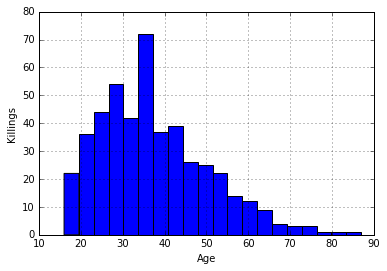

In [132]:
# 10. Display a histogram of ages of all killings
#killings_by_age = killings.groupby('age').age.value_counts()
#killings_by_age.hist(bins=10)

killings.age.hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Killings')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103e93690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13b4e22d0>]], dtype=object)

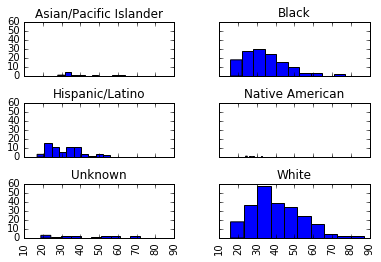

In [117]:
# 11. Show 6 histograms of ages by race
#I used the same axes so these were easier to compare. Some graphs would be easier to read on a different axis.
killings.age.hist(by=killings.race, sharex=True, sharey=True)

In [88]:
# 12. What is the average age of death by race?

killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

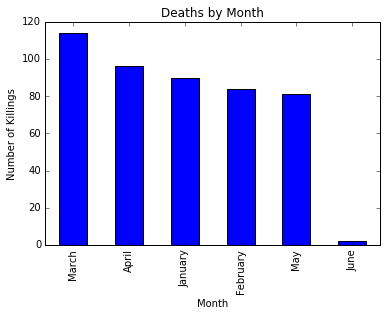

In [126]:
# 13. Show a bar chart with counts of deaths every month
#how do I change the order of the months? Can I do it just here for this graph? 

killings.month.value_counts().plot(kind='bar', title='Deaths by Month')
plt.xlabel('Month')
plt.ylabel('Number of Killings')

In [ ]:
###################
### Less Morbid ###
###################

In [8]:
majors = pd.read_csv('./data/college-majors.csv')
import matplotlib.pyplot as plt
%matplotlib inline
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [148]:
# 1. Delete the columns (employed_full_time_year_round, major_code)


del majors['Major_code']
del majors['Employed_full_time_year_round']
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


In [149]:
# 2. Show the count of missing values in each column
majors.isnull().sum()


Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [10]:
# 3. What are the top 10 highest paying majors?
#should I use average instead of median? Should I flip this? 
#tail(10)

majors.sort_index(by='Median').tail(10)


/Users/allison/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
51,51,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,3350,0,0.000000,85000,55000,125000.0
45,45,2405,CHEMICAL ENGINEERING,Engineering,188046,131697,109406,6388,0.046261,86000,60000,120000.0
48,48,2408,ELECTRICAL ENGINEERING,Engineering,671647,489965,422317,26064,0.050509,88000,60000,116000.0
97,97,4005,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,5039,150,0.024900,92000,53000,136000.0
56,56,2416,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,6419,366,0.047032,92000,52000,124000.0
58,58,2418,NUCLEAR ENGINEERING,Engineering,9826,7320,6474,527,0.067159,95000,65000,128000.0
55,55,2415,METALLURGICAL ENGINEERING,Engineering,12818,6939,5462,326,0.044873,96000,65000,123000.0
57,57,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,9226,449,0.040309,97000,60000,125000.0
154,154,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,180084,124058,89234,4414,0.034358,106000,78000,125000.0
59,59,2419,PETROLEUM ENGINEERING,Engineering,19631,14002,11636,617,0.042205,125000,75000,210000.0


/Users/allison/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


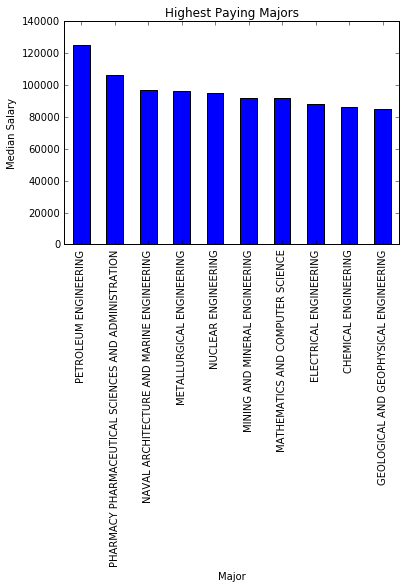

In [186]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!


majors.groupby('Major').Median.mean().order(ascending=False).head(10).plot(kind='bar', title='Highest Paying Majors')
plt.xlabel('Major')
plt.ylabel('Median Salary')


In [181]:
# 5. What is the average median salary for each major category?

majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [180]:
# 6. Show only the top 5 paying major categories
# I ranked using highest average median salary by major category

majors.groupby('Major_category').Median.mean().order(ascending=False).head()



/Users/allison/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

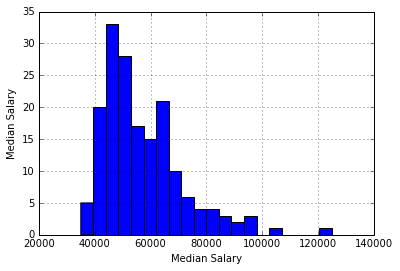

In [170]:
# 7. Plot a histogram of the distribution of median salaries
#HOW TO LABEL/IS THE GRAPH RIGHT, WHAT IS THE Y AXIS?

majors.Median.hist(bins=20)
plt.xlabel('Median Salary')
plt.ylabel('Median Salary')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103d74c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1197d4790>]], dtype=object)

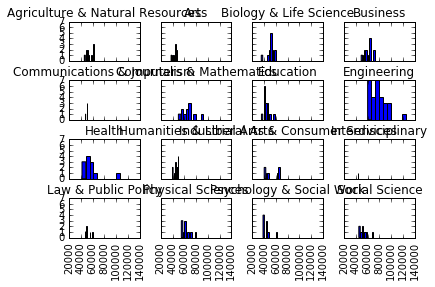

In [16]:
# 8. Plot a histogram of the distribution of median salaries by major category

##How do I fix the way the graph labels overlap with each other
majors.Median.hist(by=majors.Major_category, sharex=True, sharey=True)


In [188]:
# 9. What are the top 10 most UNemployed majors?
#I assumed most unemployed meant highest unemployment rate

majors.groupby('Major').Unemployment_rate.mean().order(ascending=False).head(10)


/Users/allison/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


Major
MISCELLANEOUS FINE ARTS                     0.156147
CLINICAL PSYCHOLOGY                         0.102712
MILITARY TECHNOLOGIES                       0.101796
SCHOOL STUDENT COUNSELING                   0.101746
LIBRARY SCIENCE                             0.094843
VISUAL AND PERFORMING ARTS                  0.094658
COMPUTER PROGRAMMING AND DATA PROCESSING    0.090264
SOCIAL PSYCHOLOGY                           0.087336
ASTRONOMY AND ASTROPHYSICS                  0.086022
ARCHITECTURE                                0.085991
Name: Unemployment_rate, dtype: float64

In [189]:
# What are the unemployment rates?


majors.groupby('Major').Unemployment_rate.mean().order(ascending=False).head(10)

/Users/allison/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


Major
MISCELLANEOUS FINE ARTS                     0.156147
CLINICAL PSYCHOLOGY                         0.102712
MILITARY TECHNOLOGIES                       0.101796
SCHOOL STUDENT COUNSELING                   0.101746
LIBRARY SCIENCE                             0.094843
VISUAL AND PERFORMING ARTS                  0.094658
COMPUTER PROGRAMMING AND DATA PROCESSING    0.090264
SOCIAL PSYCHOLOGY                           0.087336
ASTRONOMY AND ASTROPHYSICS                  0.086022
ARCHITECTURE                                0.085991
Name: Unemployment_rate, dtype: float64

In [190]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

majors.groupby('Major_category').Unemployment_rate.mean().order(ascending=False).head(10)


/Users/allison/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


Major_category
Arts                                   0.087601
Psychology & Social Work               0.077867
Interdisciplinary                      0.077269
Humanities & Liberal Arts              0.069429
Communications & Journalism            0.069125
Law & Public Policy                    0.067854
Social Science                         0.065686
Computers & Mathematics                0.059437
Industrial Arts & Consumer Services    0.058546
Physical Sciences                      0.054541
Name: Unemployment_rate, dtype: float64

In [9]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042


majors['sample_employment_rate'] = majors.Employed / majors.Total
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0,0.704225
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0,0.806338
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0,0.775173
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0,0.783948
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0,0.711738


In [11]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

majors['sample_unemployment_rate'] = 1 - majors['sample_employment_rate']
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0,0.711738,0.288262


In [ ]:
###################
### More Tasty ###
###################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [11]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_date=True, dtype={'phone_number': str})
businesses.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [124]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
#inspections.head()
inspections[inspections.business_id==10]

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled


In [122]:
violations = pd.read_csv('./data/violations_plus.csv', dayfirst=True, parse_dates=True, )

#from datetime import datetime as dt
    dtm = lambda x: dt.strptime(str(x), "%d.%m.%Y")
#violations.head()
violations[violations.business_id==10]

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [125]:
parse(date)

NameError: name 'date' is not defined

In [33]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
#pd.merge(left, right, left_index=True, right_index=True, how='outer')

violationsaddinspect = pd.merge(violations, inspections, how='left', on=['date','business_id'])

restaurant_scores = pd.merge(violationsaddinspect,businesses, how='left', on=['business_id'])



In [35]:
restaurant_scores.head()

,business_id,date,ViolationTypeID,risk_category,description,Score,type,name,address,city,...,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water,94.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils,94.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104


In [101]:
# 2 Which ten business have had the most inspections?
restaurant_scores.name.value_counts().head(10)

Peet's Coffee & Tea          119
KENTUCKY FRIED CHICKEN        69
Lers Ros Thai Noodle          67
Whole Foods Market            66
King of Thai Noodle House     64
Specialty's Cafe & Bakery     64
Hakka Restaurant              63
Starbucks Coffee              60
Cafe Bakery                   59
Happy Donut                   58
Name: name, dtype: int64

In [108]:
# 2a Which ten business have had the most inspections?
#I wanted to make a unique ID using business name + id to get the actual locations that had the most inspections. Why didn't it work?

restaurant_scores['new_id'] = str(restaurant_scores.business_id) + restaurant_scores.name
restaurant_scores.head()


,business_id,date,ViolationTypeID,risk_category,description,Score,type,name,address,city,...,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip,address_street,new_id
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,Belden Pl,0 10\n1 10\n2 10...
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,Belden Pl,0 10\n1 10\n2 10...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,Belden Pl,0 10\n1 10\n2 10...
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water,94.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,Belden Pl,0 10\n1 10\n2 10...
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils,94.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,Belden Pl,0 10\n1 10\n2 10...


In [37]:
restaurant_scores.isnull().sum()

business_id                 0
date                        0
ViolationTypeID             0
risk_category              12
description                12
Score                    5248
type                       49
name                      161
address                   161
city                     6076
postal_code              1116
latitude                10498
longitude               10498
phone_number            31858
TaxCode                   161
business_certificate     5044
application_date        11752
owner_name                248
owner_address             293
owner_city                346
owner_state               353
owner_zip                 451
dtype: int64

In [38]:
# 3 Group and count the inspections by type
restaurant_scores.type.value_counts()

Routine - Unscheduled              39056
Complaint                           2006
Reinspection/Followup               1178
New Ownership                       1120
Non-inspection site visit            208
Foodborne Illness Investigation      188
Routine - Scheduled                   60
New Construction                      45
Structural Inspection                 41
Complaint Reinspection/Followup       12
Name: type, dtype: int64

In [141]:
# 4 Create a plot that shows number of inspections per month
#How I would have done this if the date parser works
#restaurant_scores.date.value_counts().plot(kind='bar', title='Inspections by Month')
#plt.xlabel('Month')
#plt.ylabel('Number of Inspections')

#I am very confused about date parsing and slicing
#make a month column and do lambda or list comprehension to pull out just that slice
restaurant_scores['month'] = restaurant_scores.date.slice(4,6,2)



# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

AttributeError: 'Series' object has no attribute 'slice'

In [86]:
# 5 Which zip code contains the most high risk violations?


new_df = restaurant_scores[['postal_code', 'name']][restaurant_scores.risk_category=='High Risk']
new_df.postal_code.value_counts().head(10)


94133    618
94103    569
94110    557
94122    460
94109    459
94102    452
94108    308
94107    267
94115    250
94114    236
Name: postal_code, dtype: int64

In [42]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk? It is more likely to be low risk.
restaurant_scores[restaurant_scores.type=='New Ownership'].risk_category.value_counts().head(1)

Low Risk    553
Name: risk_category, dtype: int64

In [53]:
# 7 Examining the descriptions, what is the most common violation?
#Just confirming that I looked at the list of violations before filtering to just the most common violation.
restaurant_scores.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    3757
Name: description, dtype: int64

In [109]:
# 8 What street has the best (safest) restaurants to dine out at?

restaurant_scores.address.fillna(value='Unknown', inplace=True)
restaurant_scores['address_street'] = [" ".join(x.split()[1:]) for x in restaurant_scores['address']]

In [135]:
#8 safest street where safest = fewest violations
restaurant_scores.groupby('address_street').type.value_counts().order(ascending=True).head(10)
                                                                                          
                                                                                           


/Users/allison/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


address_street            type                           
30th Ave                  Routine - Unscheduled              1
Post St #58               Routine - Unscheduled              1
Post St #1                Reinspection/Followup              1
Post St                   Reinspection/Followup              1
Jerrold Ave Unit Z        Routine - Unscheduled              1
Portola Dr                Reinspection/Followup              1
CESAR CHAVEZ St           Routine - Unscheduled              1
Polk St                   Complaint Reinspection/Followup    1
Point Shipyard, Bldg.110  Routine - Unscheduled              1
                          New Ownership                      1
dtype: int64

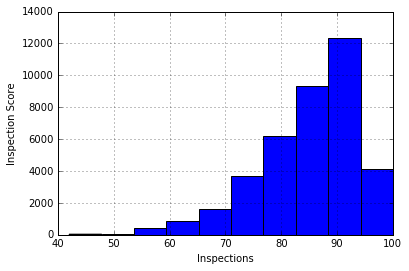

In [45]:
# 9 Create a hist of the scores with 10 bins

restaurant_scores.Score.hist(bins=10)
plt.xlabel('Inspections')
plt.ylabel('Inspection Score')

In [ ]:
# 8 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/